In [1]:
# Installation of the library can take some time. Please, be patient and wait
!pip install pmdarima 

In [2]:
import pandas as pd                   # for reading & storing data, pre-processing
import matplotlib.pylab as plt        # for visualization
from pmdarima.arima import auto_arima # for ARIMA model discovering

%matplotlib inline

In [3]:
df = pd.read_csv("data/08-covid-19.csv")
df.head()

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source,note
0,Afghanistan,AFG,Asia,38928341,cases,0.0,2020-01,NaN,0.0,Epidemic intelligence national data,NaN
1,Afghanistan,AFG,Asia,38928341,cases,0.0,2020-02,0.0,0.0,Epidemic intelligence national data,NaN
2,Afghanistan,AFG,Asia,38928341,cases,0.0,2020-03,0.0,0.0,Epidemic intelligence national data,NaN
3,Afghanistan,AFG,Asia,38928341,cases,0.0,2020-04,0.0,0.0,Epidemic intelligence national data,NaN
4,Afghanistan,AFG,Asia,38928341,cases,0.0,2020-05,0.0,0.0,Epidemic intelligence national data,NaN


In [4]:
# Read the Germany's records only
DEU_df = df[df['country_code'] == 'DEU'][['indicator', 'year_week', 'weekly_count']]

# Get the cases records
DEU_cases = DEU_df[DEU_df['indicator'] == 'cases'][['year_week', 'weekly_count']]

DEU_cases = DEU_cases.set_index(['year_week'])

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=3123.890, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=3110.167, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=3105.478, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3121.920, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=3106.650, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=3106.880, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=3086.351, Time=0.10 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=3070.717, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=3071.330, Time=0.23 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=3074.020, Time=0.10 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=3074.519, Time=0.13 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=3071.882, Time=0.08 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=3070.926, Time=0.18 sec
 ARIMA(2,2,2)(0,0,0)[0]             : 

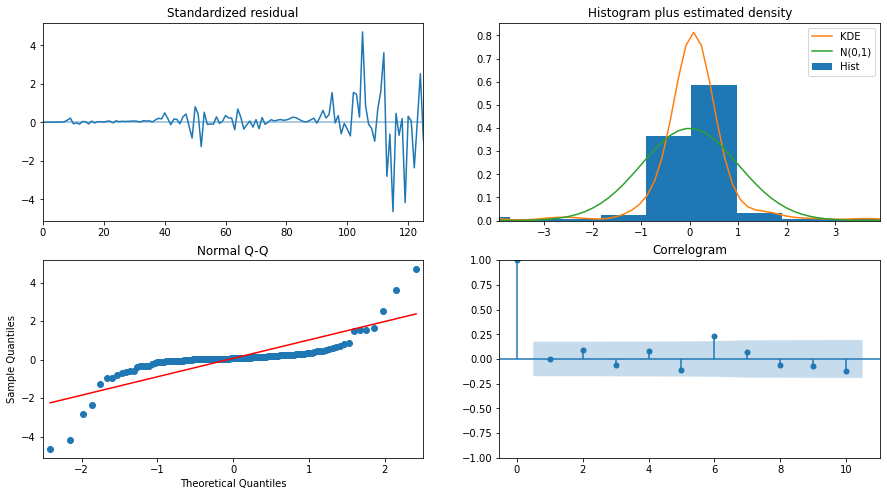

In [5]:
# The auto_arima function seeks to identify the most optimal parameters for an ARIMA model, 
# and returns a fitted ARIMA model

model_autoARIMA = auto_arima(DEU_cases, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()